In [1]:
import datetime
import os
import re
import multiprocessing
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from setup_residual_totirr import (
    getEVEInd,
    handleStd,
    getXy,
    addOne,
    getResid,
    fitSGDR_Huber,
    applySGDmodel,
    cvSGDH,
    getNormalize,
)

## Train Linear Model on Means & STDs of AIA Images

In [3]:
root = Path("/Users/andrewrobbertz/__SOC_CODE__/_data_/SDO/")
download_dir = root / "downloads"
experiments_dir = root / "experiments"

assert download_dir.exists(), f"Download directory {download_dir} does not exist."
assert (
    experiments_dir.exists()
), f"Experiments directory {experiments_dir} does not exist."

In [4]:
data_root = experiments_dir

In [5]:
EVE_path = "%s/irradiance_30mn_14ptot.npy" % data_root
print("Loading EVE data from %s" % EVE_path)

Loading EVE data from /Users/andrewrobbertz/__SOC_CODE__/_data_/SDO/experiments/irradiance_30mn_14ptot.npy


In [6]:
# get the data
XTe, ___, ______ = getXy(EVE_path, f"{data_root}/", "test")
XTr, yTr, maskTr = getXy(EVE_path, f"{data_root}/", "train")
XVa, yVa, maskVa = getXy(EVE_path, f"{data_root}/", "val")

test 0/655
test 100/655
test 200/655
test 300/655
test 400/655
test 500/655
test 600/655
train 0/4580
train 100/4580
train 200/4580
train 300/4580
train 400/4580
train 500/4580
train 600/4580
train 700/4580
train 800/4580
train 900/4580
train 1000/4580
train 1100/4580
train 1200/4580
train 1300/4580
train 1400/4580
train 1500/4580
train 1600/4580
train 1700/4580
train 1800/4580
train 1900/4580
train 2000/4580
train 2100/4580
train 2200/4580
train 2300/4580
train 2400/4580
train 2500/4580
train 2600/4580
train 2700/4580
train 2800/4580
train 2900/4580
train 3000/4580
train 3100/4580
train 3200/4580
train 3300/4580
train 3400/4580
train 3500/4580
train 3600/4580
train 3700/4580
train 3800/4580
train 3900/4580
train 4000/4580
train 4100/4580
train 4200/4580
train 4300/4580
train 4400/4580
train 4500/4580
val 0/1308
val 100/1308
val 200/1308
val 300/1308
val 400/1308
val 500/1308
val 600/1308
val 700/1308
val 800/1308
val 900/1308
val 1000/1308
val 1100/1308
val 1200/1308
val 1300/1308


In [7]:
np.savez_compressed("%s/mean_std_feats.npz" % data_root, XTr=XTr, XVa=XVa, XTe=XTe)

In [8]:
mu, sig = getNormalize(XTr)

XTr = addOne((XTr - mu) / sig)
XVa = addOne((XVa - mu) / sig)
XTe = addOne((XTe - mu) / sig)

In [9]:
model = cvSGDH(XTr, yTr, XVa, yVa, maskVa)

CV'ing huber epsilon, regularization
a = 10e-5, eps = 1.000000 => 0.063972
a = 10e-4, eps = 1.000000 => 0.063972
a = 10e-3, eps = 1.000000 => 0.063998
a = 10e-2, eps = 1.000000 => 0.067391
a = 10e-1, eps = 1.000000 => 0.144655
a = 10e0, eps = 1.000000 => 0.864759
a = 10e-5, eps = 0.500000 => 0.071665
a = 10e-4, eps = 0.500000 => 0.071670


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-3, eps = 0.500000 => 0.071750
a = 10e-2, eps = 0.500000 => 0.075035
a = 10e-1, eps = 0.500000 => 0.512213
a = 10e0, eps = 0.500000 => 0.932065
a = 10e-5, eps = 0.333333 => 0.094062
a = 10e-4, eps = 0.333333 => 0.094711
a = 10e-3, eps = 0.333333 => 0.101543
a = 10e-2, eps = 0.333333 => 0.185633
a = 10e-1, eps = 0.333333 => 0.655588


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e0, eps = 0.333333 => 0.954615
a = 10e-5, eps = 0.250000 => 0.288858
a = 10e-4, eps = 0.250000 => 0.289696
a = 10e-3, eps = 0.250000 => 0.297992
a = 10e-2, eps = 0.250000 => 0.373365
a = 10e-1, eps = 0.250000 => 0.727341
a = 10e0, eps = 0.250000 => 0.965936
a = 10e-5, eps = 0.200000 => 0.418609
a = 10e-4, eps = 0.200000 => 0.419275


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-3, eps = 0.200000 => 0.425873
a = 10e-2, eps = 0.200000 => 0.486091
a = 10e-1, eps = 0.200000 => 0.771690
a = 10e0, eps = 0.200000 => 0.972749
a = 10e-5, eps = 0.166667 => 0.504906
a = 10e-4, eps = 0.166667 => 0.505460
a = 10e-3, eps = 0.166667 => 0.510955
a = 10e-2, eps = 0.166667 => 0.561201
a = 10e-1, eps = 0.166667 => 0.809930


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e0, eps = 0.166667 => 0.977291
a = 10e-5, eps = 0.142857 => 0.566455
a = 10e-4, eps = 0.142857 => 0.566932
a = 10e-3, eps = 0.142857 => 0.571660
a = 10e-2, eps = 0.142857 => 0.614852
a = 10e-1, eps = 0.142857 => 0.837069
a = 10e0, eps = 0.142857 => 0.980535
a = 10e-5, eps = 0.125000 => 0.612619
a = 10e-4, eps = 0.125000 => 0.613037


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-3, eps = 0.125000 => 0.617179
a = 10e-2, eps = 0.125000 => 0.655003
a = 10e-1, eps = 0.125000 => 0.857399
a = 10e0, eps = 0.125000 => 0.982968
a = 10e-5, eps = 0.111111 => 0.648438
a = 10e-4, eps = 0.111111 => 0.648810
a = 10e-3, eps = 0.111111 => 0.652497
a = 10e-2, eps = 0.111111 => 0.686178
a = 10e-1, eps = 0.111111 => 0.873212


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e0, eps = 0.111111 => 0.984860
Best a = 10e-4, eps = 1.000000


In [10]:
# Predictions = X*W'
yTrp = np.dot(XTr, model.T)
yVap = np.dot(XVa, model.T)
yTep = np.dot(XTe, model.T)

In [11]:
# these are the new targets
diffTr = yTr - yTrp
diffTr[maskTr] = 0
diffVa = yVa - yVap
diffVa[maskVa] = 0

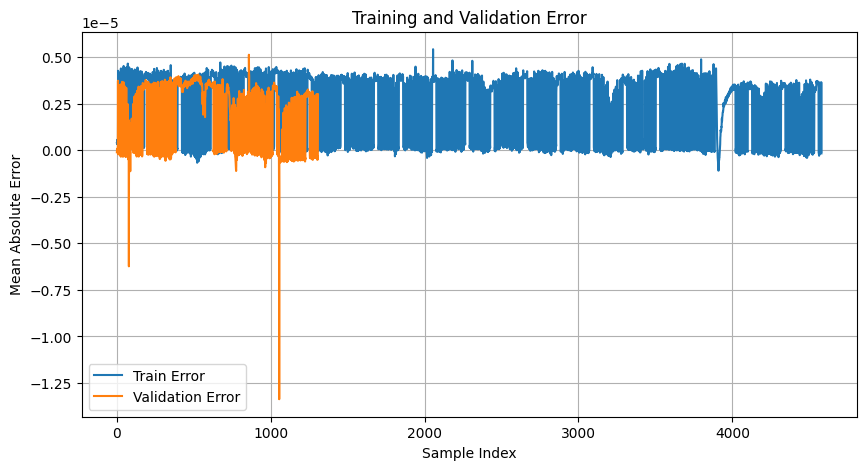

In [12]:
train_error = np.mean(diffTr, axis=1)
val_error = np.mean(diffVa, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_error, label="Train Error")
plt.plot(val_error, label="Validation Error")
plt.xlabel("Sample Index")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Validation Error")
plt.legend()
plt.grid()
plt.show()

In [13]:
print("Train Error: Mean = %.7f, Std = %.7f" % (train_error.mean(), train_error.std()))
print("Validation Error: Mean = %.7f, Std = %.7f" % (val_error.mean(), val_error.std()))

Train Error: Mean = 0.0000010, Std = 0.0000016
Validation Error: Mean = 0.0000010, Std = 0.0000018


In [14]:
# update EVE
EVE = np.load(EVE_path)
updates = [("train", diffTr), ("val", diffVa)]
for phaseName, newVals in updates:
    yind, xind = getEVEInd(f"{data_root}/", phaseName)
    for yii, yi in enumerate(yind):
        EVE[yi, xind] = newVals[yii, :]

# new statistics
residualMean = np.mean(diffTr, axis=0)
residualStd = np.std(diffTr, axis=0)

np.save("%s/eve_residual_mean_14ptot.npy" % data_root, residualMean)
np.save("%s/eve_residual_std_14ptot.npy" % data_root, residualStd)

# rescale targets
EVE *= 100

# Save the new target and the model
np.save("%s/irradiance_30mn_residual_14ptot.npy" % data_root, EVE)
np.savez_compressed(
    "%s/residual_initial_model.npz" % data_root, model=model, mu=mu, sig=sig
)